<a href="https://colab.research.google.com/github/practical2424/LP5-DL/blob/main/DL2a_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(type([max(sequence) for sequence in train_data]))
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [3]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

X_train = vectorize_sequences(train_data)

X_test = vectorize_sequences(test_data)

In [5]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
X_train.shape

(25000, 10000)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

In [10]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5522 - binary_accuracy: 0.7661 - val_loss: 0.4276 - val_binary_accuracy: 0.8497
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3431 - binary_accuracy: 0.8863 - val_loss: 0.3293 - val_binary_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 2s 70ms/step - loss: 0.2588 - binary_accuracy: 0.9101 - val_loss: 0.2932 - val_binary_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2113 - binary_accuracy: 0.9277 - val_loss: 0.2804 - val_binary_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1777 - binary_accuracy: 0.9404 - val_loss: 0.2771 - val_binary_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1510 - binary_accuracy: 0.9494 - val_loss: 0.2825 - val_binary_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

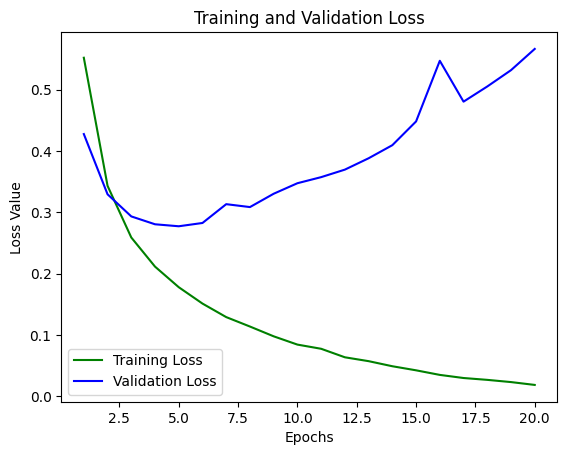

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

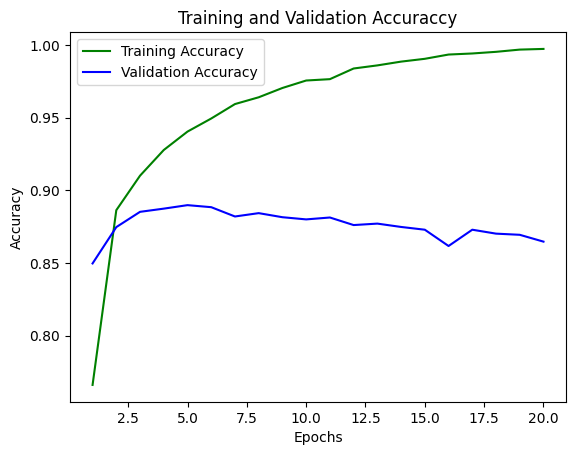

In [15]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model.fit(
    partial_X_train,
    partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/3
30/30 [==============================] - 2s 60ms/step - loss: 0.0175 - binary_accuracy: 0.9979 - val_loss: 0.6527 - val_binary_accuracy: 0.8546
Epoch 2/3
30/30 [==============================] - 2s 54ms/step - loss: 0.0115 - binary_accuracy: 0.9995 - val_loss: 0.6292 - val_binary_accuracy: 0.8596
Epoch 3/3
30/30 [==============================] - 2s 51ms/step - loss: 0.0120 - binary_accuracy: 0.9987 - val_loss: 0.6367 - val_binary_accuracy: 0.8656


In [17]:
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 2s 3ms/step


In [18]:
result

array([[0.00980361],
       [1.        ],
       [0.9101504 ],
       ...,
       [0.00194422],
       [0.00404665],
       [0.9421449 ]], dtype=float32)

In [19]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
mae

0.1456